# Testing numpy Stride 
For snr calculation windowing

In [21]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from __future__ import division
from numpy.lib import stride_tricks
import pandas as pd
import seaborn as sns
%matplotlib inline


In [22]:
fname = "Test_spectra.fits"
data = fits.getdata(fname)
hdr = fits.getheader(fname)

wl = data["Wavelength"]
I = data["Extracted_DRACS"]
#print(type(I))
print(I.dtype)
wl = np.array(wl, dtype="float64")  # Turn >f4 into float64
I = np.array(I, dtype="float64")  # Turn >f4 into float64
print(I.dtype)
print(I)

>f4
float64
[ 0.98955095  0.98883367  0.98798239 ...,  1.00619888  1.00780976
  1.00937068]


In [ ]:
binsize = 100

# Try using stride on np.array

# striding
nums = np.arange(len(I), dtype="int")

print("itemsize", nums.itemsize, "dtype", nums.dtype)
hop_length = 1
#stride_tests with numbers
frame_length = binsize
num_frames = 1 + (len(nums)-frame_length)/hop_length
row_stride = nums.itemsize * hop_length # *hopesize
print(frame_length)
print(num_frames)
print(row_stride)

col_stride = nums.itemsize

nums_strided = stride_tricks.as_strided(nums, shape=(num_frames, frame_length), strides=(row_stride, col_stride))
       	
print("nums", nums)
print("nums_strided =", nums_strided)

# row wise transform
row_sum = np.sum(nums_strided, axis=1)
#print(row_sum)
snr = 1/np.std(nums_strided, axis=1)
print(snr)

In [ ]:
# with I
frame_length = binsize
num_frames = 1 + (len(I)-frame_length)/hop_length
row_stride = I.itemsize * hop_length # *hopesize
print(frame_length)
print(num_frames)
print(row_stride)

col_stride = I.itemsize
I_strided = stride_tricks.as_strided(I, shape=(num_frames, frame_length), strides=(row_stride, col_stride))
     	
#print("nums", I)
#print("nums_strided =", I_strided)
       
snr = 1/np.std(I_strided, axis=1)
print(snr)

In [ ]:
plt.plot(snr)
plt.show()

In [23]:

def strided_snr(data, frame_length, hop_length=1):
    num_frames = 1 + (len(data)-frame_length)/hop_length
    row_stride = data.itemsize * hop_length # *hopesize
    col_stride = data.itemsize
    data_strided = stride_tricks.as_strided(data, shape=(num_frames, frame_length), strides=(row_stride, col_stride))
    
    print("length of data_strided",len(data_strided))
    snr = 1/np.std( data_strided, axis=1)
    #print("frame_length", frame_length)
    #print("num_frames", num_frames)
    #print("len(snr)",len(snr))
    #print(snr)
    
    #zeropad to make uniform length of spectra
    missing_size = len(data)-len(snr)
    print("missing size", missing_size)
    before = missing_size//2
    end = missing_size//2
    if missing_size%2 is not 0:
        print("missing size is not even")
    padded_snr = np.pad(snr, (before, end),"constant")
    #print("padded length",len(padded_snr))
    #print(padded_snr)
    return padded_snr

def strided_sum(data, frame_length, hop_length=1):
    num_frames = 1 + (len(data)-frame_length)/hop_length
    row_stride = data.itemsize * hop_length # *hopesize
    col_stride = data.itemsize
    data_strided = stride_tricks.as_strided(data, shape=(num_frames, frame_length), strides=(row_stride, col_stride))
    
    print("length of data_strided",len(data_strided))
    print("binsize", frame_length)
    print("hop_length", hop_length)
    print(data_strided)
    total = np.sum(data_strided, axis=1)
    #print("frame_length", frame_length)
    #print("num_frames", num_frames)
    #print("len(snr)",len(snr))
    #print(snr)
    
    #zeropad to make uniform length of spectra
    missing_size = len(data)-len(total)
    pad_size = (len(data)-len(total) )//2
    #print("missing size", missing_size)
    before = missing_size//2
    end = missing_size//2
    if missing_size%2 is not 0:
        print("missing size is not even")
    padded_total = np.pad(total, (pad_size,pad_size),"constant")
    #print("padded length",len(padded_snr))
    #print(padded_snr)
    return padded_total


# This doesn't seem to work that well with pandas not sure why
#store_array = np.empty((1024,len(bins)),dtype=data.dtype)
#for i, bin in enumerate(bins):
#   store_array[:,i] = strided_snr(I, bin)



In [30]:
# loop over the different bin sizes
bins = np.arange(3,51,2)
hopper = 1
store_list = []
for i, b in enumerate(bins):
   store_list.append( strided_snr(I, b, hop_length=hopper))
print("done")

length of data_strided 1022
missing size 2
length of data_strided 1020
missing size 4
length of data_strided 1018
missing size 6
length of data_strided 1016
missing size 8
length of data_strided 1014
missing size 10
length of data_strided 1012
missing size 12
length of data_strided 1010
missing size 14
length of data_strided 1008
missing size 16
length of data_strided 1006
missing size 18
length of data_strided 1004
missing size 20
length of data_strided 1002
missing size 22
length of data_strided 1000
missing size 24
length of data_strided 998
missing size 26
length of data_strided 996
missing size 28
length of data_strided 994
missing size 30
length of data_strided 992
missing size 32
length of data_strided 990
missing size 34
length of data_strided 988
missing size 36
length of data_strided 986
missing size 38
length of data_strided 984
missing size 40
length of data_strided 982
missing size 42
length of data_strided 980
missing size 44
length of data_strided 978
missing size 46
len

In [31]:
#print(store_array)
print(store_list)

[array([    0.        ,  1559.72523929,   663.35644465, ...,   635.85609204,
         772.23888547,     0.        ]), array([   0.        ,    0.        ,  719.91783335, ...,  374.76976134,
          0.        ,    0.        ]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., .

In [32]:
#turn into a pandas dataframe
#dataframe = pd.DataFrame(data=store_array, columns=range(1024), index=bins)
#dataframe = pd.DataFrame(store_array, index=bins, columns=list(range(1024)))
#print(dataframe)
                         
#print(dataframe.dtypes)                    

In [33]:
df_list = pd.DataFrame(store_list, index=bins, columns=np.round(wl,2))
print(df_list)


    2126.81      2126.82     2126.83     2126.84     2126.85     2126.86  \
3       0.0  1559.725239  663.356445  613.906925  455.205851  384.504694   
5       0.0     0.000000  719.917833  353.536398  291.189999  251.713481   
7       0.0     0.000000    0.000000  298.532229  212.782567  215.299127   
9       0.0     0.000000    0.000000    0.000000  208.999605  201.477813   
11      0.0     0.000000    0.000000    0.000000    0.000000  197.849990   
13      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
15      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
17      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
19      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
21      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
23      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
25      0.0     0.000000    0.000000    0.000000    0.000000    0.000000   
27      0.0 

[<matplotlib.text.Text at 0xa47ae10>, <matplotlib.text.Text at 0xa4cf358>]

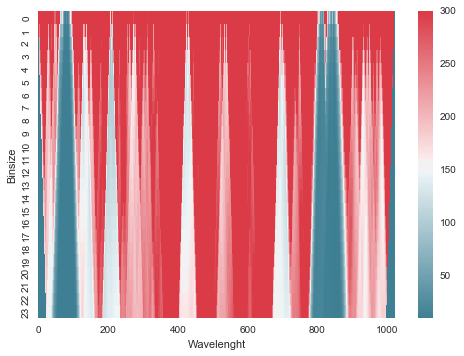

In [36]:
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(store_list, cmap=cmap, xticklabels=200, vmax=300, vmin=10)
#ax = sns.heatmap(df_list)
#plt.xticks(np.arange(int(np.min(wl)), int(np.max(wl)+1), 1.0))
ax.set(ylabel="Binsize", xlabel="Wavelenght")

[<matplotlib.text.Text at 0xa24f828>, <matplotlib.text.Text at 0xa0062b0>]

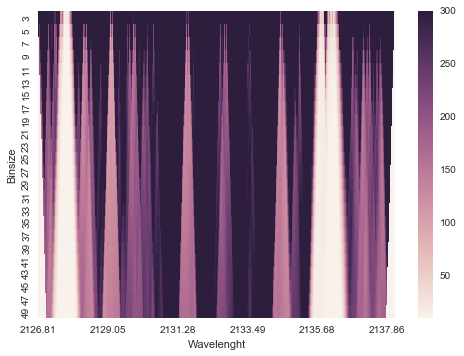

In [37]:
# seaborn heatmap plot
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(df_list, xticklabels=200, vmax=300, vmin=10)
#ax = sns.heatmap(df_list)
#plt.xticks(np.arange(int(np.min(wl)), int(np.max(wl)+1), 1.0))
ax.set(ylabel="Binsize",
       xlabel="Wavelenght")

In [35]:
#ax = sns.heatmap(store_list)
wl[50]-wl[0]


0.562255859375

# test on known data

In [17]:
data = np.arange(20)

binsizes = range(1,6,2)
store = []
#opt = np.get_printoptions()
#np.set_printoptions(threshold='nan')
  


for b in binsizes:
   store.append(strided_sum(data, b))

#np.set_printoptions(**opt)


length of data_strided 20
binsize 1
hop_length 1
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
length of data_strided 18
binsize 3
hop_length 1
[[ 0  1  2]
 [ 1  2  3]
 [ 2  3  4]
 [ 3  4  5]
 [ 4  5  6]
 [ 5  6  7]
 [ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]
 [10 11 12]
 [11 12 13]
 [12 13 14]
 [13 14 15]
 [14 15 16]
 [15 16 17]
 [16 17 18]
 [17 18 19]]
length of data_strided 16
binsize 5
hop_length 1
[[ 0  1  2  3  4]
 [ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 12]
 [ 9 10 11 12 13]
 [10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]
 [15 16 17 18 19]]


In [18]:
SNRrand = pd.DataFrame(store, index=binsizes)
print(SNRrand)


   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18   
3   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54   
5   0   0  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85   0   

   19  
1  19  
3   0  
5   0  


[<matplotlib.text.Text at 0xaad9908>, <matplotlib.text.Text at 0xa546748>]

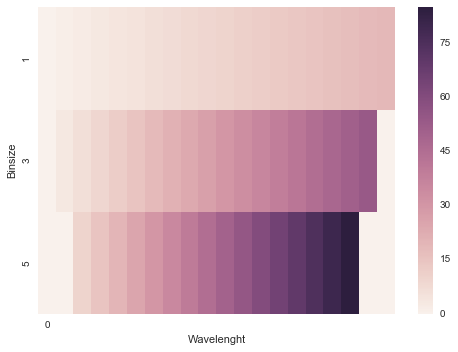

In [19]:
sns.set()
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(SNRrand,  xticklabels=20)
#ax = sns.heatmap(df_list)
#plt.xticks(np.arange(int(np.min(wl)), int(np.max(wl)+1), 1.0))
ax.set(ylabel="Binsize",
       xlabel="Wavelenght")